In [1]:
%load_ext autoreload
%autoreload 2
import mc.pocket as pocket
%aimport mc.pocket
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$\\langle \\rho(x,0)\\rho(0,0) \\rangle$')

<Figure size 640x480 with 0 Axes>

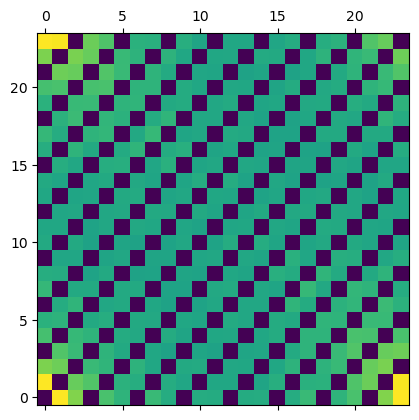

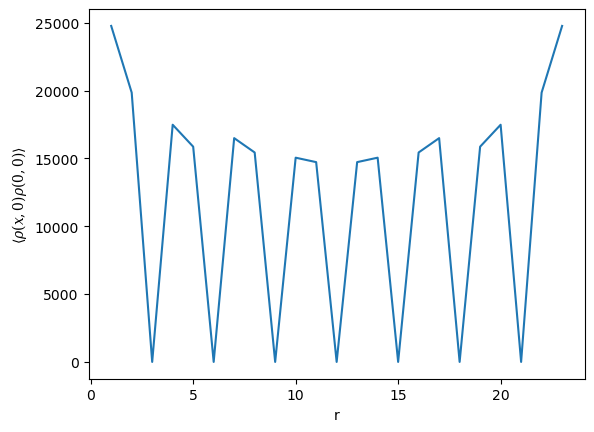

In [32]:
pocket.width = 24
dists = np.load("24x24-1000000.npy")

plt.figure()
plt.matshow(dists, origin="lower")
plt.figure()
Xs = np.arange(1, pocket.width)
plt.plot(Xs, [dists[(x, 0)] for x in Xs])
plt.xlabel("r")
plt.ylabel("$\\langle \\rho(x,0)\\rho(0,0) \\rangle$")

Text(0.5, 0, '$\\overline{r}$')

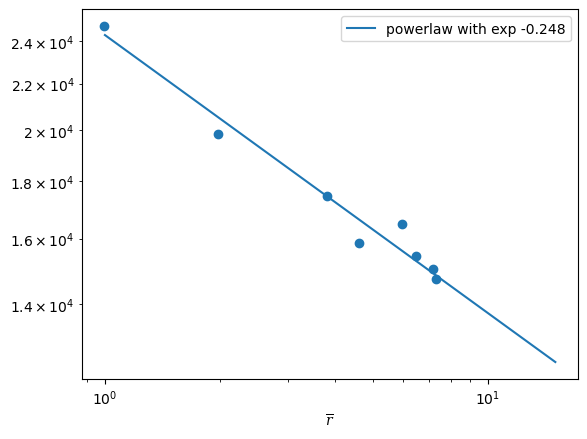

In [34]:
L = len(Xs)
halfXs = Xs[:int(L/2)]
tfXs = np.sin(np.pi/L * halfXs) / (np.pi/L)
halfYs = np.array([dists[x, 0] for x in halfXs])
F = halfYs > 0

plt.scatter(tfXs[F], halfYs[F])

def fit(x, A, B):
    return B * np.power(x, A)

import scipy
P, _ = scipy.optimize.curve_fit(fit, tfXs[F], halfYs[F])

plt.plot(np.linspace(1, 15, 100), fit(np.linspace(1, 15, 100), *P), label=f"powerlaw with exp {P[0]:.3f}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("$\\overline{r}$")

<Figure size 640x480 with 0 Axes>

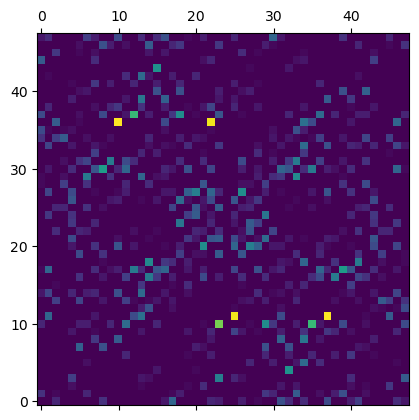

In [10]:
pocket.width = 48
obj = np.load("48x48-3-100000-mono-di.npy", allow_pickle=True).item()
keys = list(obj.keys())
xmax = max(x for x,y in keys)
xmin = min(x for x,y in keys)
ymax = max(y for x,y in keys)
ymin = min(y for x,y in keys)

dists = np.zeros((xmax-xmin+1, ymax-ymin+1))
for key, value in obj.items():
	dists[key[0]-xmin, key[1]-ymin] = value

dists[:, :] += dists[::-1, ::-1]

plt.figure()
plt.matshow(dists.T, origin="lower")

<Figure size 640x480 with 0 Axes>

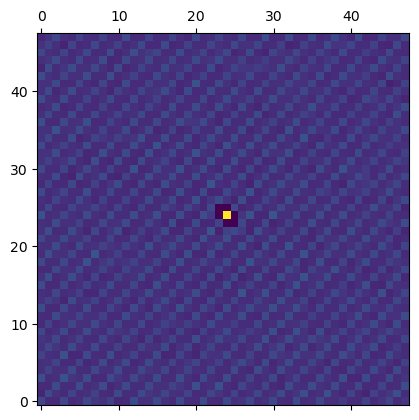

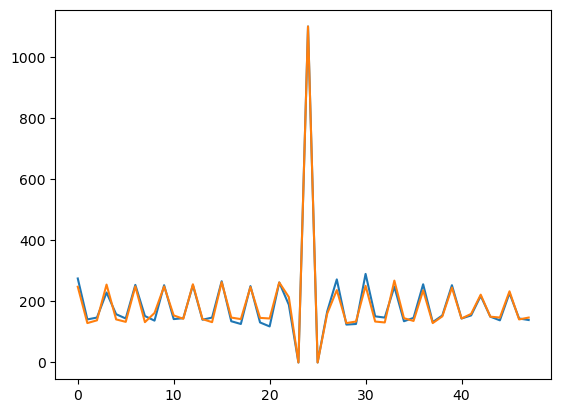

In [67]:
pocket.width = 48
obj = np.load("48x48-3-100000-tri-tri.npy", allow_pickle=True).item()
keys = list(obj.keys())
xmax = max(x for x,y in keys)
xmin = min(x for x,y in keys)
ymax = max(y for x,y in keys)
ymin = min(y for x,y in keys)

dists = np.zeros((xmax-xmin+1, ymax-ymin+1))
for key, value in obj.items():
	dists[key[0]-xmin, key[1]-ymin] += value

plt.figure()
plt.matshow(dists.T, origin="lower")
plt.figure()
plt.plot(dists[:, 24])
plt.plot(dists[24, :])

[25 28 31 34 37 40 43 46]


Text(0.5, 0, '$\\overline{r}$')

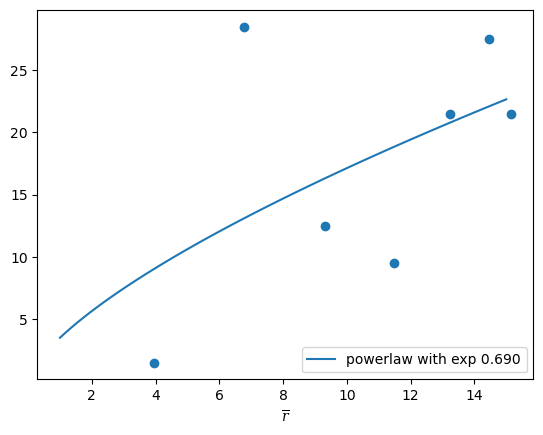

In [74]:
Xs = np.arange(pocket.width)
L = len(Xs)
halfXs = Xs[int(L/2)+1::3]
print(halfXs)
tfXs = np.sin(np.pi/L * (halfXs - L/2)) / (np.pi/L)
halfYs = np.array([dists[x, 24] for x in halfXs])
F = halfYs > 0

halfYs -= halfYs[:13].mean()
halfYs = np.abs(halfYs)

plt.scatter(tfXs[F], halfYs[F])

def fit(x, A, B):
    return B * np.power(x, A)

import scipy
P, _ = scipy.optimize.curve_fit(fit, tfXs[F], halfYs[F])

plt.plot(np.linspace(1, 15, 100), fit(np.linspace(1, 15, 100), *P), label=f"powerlaw with exp {P[0]:.3f}")
# plt.xscale("log")
# plt.yscale("log")
plt.legend()
plt.xlabel("$\\overline{r}$")